In [35]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions

from pyHalo.PresetModels.cdm import CDM
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from time import time
import os


### You can use the code in this notebook to reproduce Figure 3. I suggest copying the code into a script that you can run in parallel on a computing cluster (see fig3_script.py for an example) to make the calculation faster. 

To run this notebook, you'll need to install pyHalo (https://github.com/dangilman/pyHalo), quadmodel (https://github.com/dangilman/quadmodel), lenstronomy (https://github.com/dangilman/lenstronomy), and trikde (https://github.com/dangilman/trikde)

First create a mock lens with no substructure

In [48]:
# from lenstronomy.LensModel.lens_model import LensModel
# from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
# from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
# import numpy as np
# import sys
# import os
# from samana.forward_model import forward_model
# from samana.Data.data_base import QuadNoImageDataBase
# from samana.image_magnification_util import setup_gaussian_source
# from samana.Model.b1422_model import B1422ModelEPLM3M4Shear
# from lenstronomy.LensModel.Solver.solver import Solver4Point


# z_lens = 0.5
# z_source = 1.5
# lens_model_macro = LensModel(['EPL', 'SHEAR'])
# kwargs_macro = [{'theta_E': 1.0, 'center_x': 0.0, 'center_y': 0.0, 'e1': 0.2, 'e2': 0.0, 'gamma': 2.0},
#                 {'gamma1': 0.05, 'gamma2':0.03}]
# solver = LensEquationSolver(lens_model_macro)
# ext = LensModelExtensions(lens_model_macro)
# source_x, source_y = 0.05, 0.04
# x_image, y_image = solver.image_position_from_source(source_x, source_y, kwargs_macro)
# #import matplotlib.pyplot as plt
# #plt.scatter(x_image, y_image)

# source_size_parsec = 5.
# source_model, kwargs_source = setup_gaussian_source(source_size_parsec, source_x, source_y,
#                                                     None, z_source)
# magnifications = ext.magnification_finite_adaptive(x_image, y_image, kwargs_macro,
#                                                    source_model, kwargs_source, grid_resolution=0.0001,
#                                                    grid_radius_arcsec=0.1)
# fluxes = magnifications / max(magnifications)
# #plt.xlim(-1.5, 1.5)
# #plt.ylim(-1.5, 1.5)
# #plt.show()

# class Data(QuadNoImageDataBase):
#     def __init__(self, zlens, zsource, x, y, m):
#         delta_m = None
#         delta_xy = [0.005] * len(x)
#         keep_flux_ratio_index = [0, 1, 2]
#         super(Data, self).__init__(zlens, zsource, np.array(x),
#                                    np.array(y), np.array(m), delta_xy, delta_m, True, keep_flux_ratio_index)
# data_class = Data(z_lens, z_source, x_image, y_image, magnifications)

# class Model(B1422ModelEPLM3M4Shear):
#     def setup_lens_model(self, kwargs_lens_macro_init=None, macromodel_samples_fixed=None):

#         theta_E = np.random.normal(1.0, 0.02)
#         e1 = np.random.normal(0.2, 0.05)
#         e2 = np.random.normal(0.0, 0.05)
#         gamma = np.random.normal(2.0, 0.05)
#         gamma1 = np.random.normal(0.05, 0.01)
#         gamma2 = np.random.normal(0.03, 0.01)
#         lens_model_list_macro = ['EPL_MULTIPOLE_M3M4', 'SHEAR']
#         kwargs_lens_macro = [{'theta_E': theta_E, 'center_x': 0.0,
#                               'center_y': 0.0, 'e1': e1,
#                               'e2': e2, 'gamma': gamma, 'a3_a': 0.0, 'a4_a': 0.0,
#                               'delta_phi_m3': 0.0, 'delta_phi_m4': 0.0},
#                              {'gamma1': gamma1, 'gamma2': gamma2}]
#         redshift_list_macro = [self._data.z_lens, self._data.z_lens]
#         index_lens_split = [0, 1]
#         if kwargs_lens_macro_init is not None:
#             for i in range(0, len(kwargs_lens_macro_init)):
#                 for param_name in kwargs_lens_macro_init[i].keys():
#                     kwargs_lens_macro[i][param_name] = kwargs_lens_macro_init[i][param_name]
#         kwargs_lens_init = kwargs_lens_macro
#         kwargs_lens_sigma = [{'theta_E': 0.05, 'center_x': 0.1, 'center_y': 0.1, 'e1': 0.2, 'e2': 0.2, 'gamma': 0.1,
#                               'a4_a': 0.01, 'a3_a': 0.005, 'delta_phi_m3': np.pi/12, 'delta_phi_m4': np.pi/16},
#                              {'gamma1': 0.05, 'gamma2': 0.05}]
#         kwargs_lens_fixed = [{}, {'ra_0': 0.0, 'dec_0': 0.0}]
#         kwargs_lower_lens = [
#             {'theta_E': 0.05, 'center_x': -10.0, 'center_y': -10.0, 'e1': -0.5, 'e2': -0.5, 'gamma': 1.5, 'a4_a': -0.1,
#              'a3_a': -0.1, 'delta_phi_m3': -np.pi/6, 'delta_phi_m4': -10.0},
#             {'gamma1': -0.5, 'gamma2': -0.5}]
#         kwargs_upper_lens = [
#             {'theta_E': 5.0, 'center_x': 10.0, 'center_y': 10.0, 'e1': 0.5, 'e2': 0.5, 'gamma': 3.5, 'a4_a': 0.1,
#              'a3_a': 0.1, 'delta_phi_m3': np.pi/6, 'delta_phi_m4': 10.0},
#             {'gamma1': 0.5, 'gamma2': 0.5}]
#         kwargs_lens_fixed, kwargs_lens_init = self.update_kwargs_fixed_macro(lens_model_list_macro, kwargs_lens_fixed,
#                                                                              kwargs_lens_init, macromodel_samples_fixed)
#         ext = Solver4Point(LensModel(lens_model_list_macro))
#         kwargs_lens_init = ext.constraint_lensmodel(self._data.x_image, self._data.y_image,
#                                                      kwargs_lens_init)[0]
#         lens_model_params = [kwargs_lens_init, kwargs_lens_sigma, kwargs_lens_fixed, kwargs_lower_lens,
#                              kwargs_upper_lens]
#         return lens_model_list_macro, redshift_list_macro, index_lens_split, lens_model_params
    
# lens_data = Data(z_lens, z_source, x_image, y_image, fluxes)
# print('x: ', repr(lens_data.x_image))
# print('y: ', repr(lens_data.y_image))
# print('magnifications: ', magnifications)
# print('flux ratios: ', lens_data.magnifications[1:] / lens_data.magnifications[0])

# n_keep = 10
# summary_statistic_tolerance = np.inf # accept every realization

# try:
#     job_index = int(sys.argv[1])
#     base_path = os.getenv('SCRATCH') + '/chains'
# except:
#     base_path = os.getcwd()
#     job_index = 1

    
# #random_seed_init = int(n_keep * int(sys.argv[1]))
# random_seed_init = 1
# verbose = True
# test_mode = True

# kwargs_sample_source = {'source_size_pc': ['UNIFORM', 1, 10]}
# kwargs_sample_macro_fixed = {
#         'gamma': ['GAUSSIAN', 2.0, 0.1],
#     'a4_a': ['FIXED', 0.0],
#     'a3_a': ['FIXED', 0.0],
#     'delta_phi_m3': ['FIXED', 0.0],
#     'delta_phi_m4': ['FIXED', 0.0]
# }
# kwargs_sample_realization = {'sigma_sub': ['FIXED', 0.05],
#                              'log_mlow': ['FIXED', 6.0]}

# preset_model_name = 'CDM'

# # output_path = base_path + '/exact_ray_tracing_CDM_v2/'
# # forward_model(output_path, job_index, n_keep, data_class, Model, preset_model_name,
# #                   kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed,
# #                summary_statistic_tolerance, random_seed_init=random_seed_init,
# #               rescale_grid_resolution=2.0, verbose=verbose,
# #               test_mode=test_mode, use_imaging_data=False,
# #               use_decoupled_multiplane_approximation=False)

# output_path = base_path + '/approx_ray_tracing_CDM_v2/'
# forward_model(output_path, job_index, n_keep, data_class, Model, preset_model_name,
#                   kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed,
#                summary_statistic_tolerance, random_seed_init=random_seed_init,
#               rescale_grid_resolution=2.0, verbose=verbose,
#               test_mode=test_mode, use_imaging_data=False,
#               use_decoupled_multiplane_approximation=True)

### Compute the flux ratios with full multi-plane ray tracing

This code will generate the samples used to make the figure (if you uncomment and run the cell)

In [37]:
# # USE EXACT RAY TRACING 

# n_keep = 10000
# summary_statistic_tolerance = np.inf # accept every realization
# realization_priors = {}
# realization_priors['PRESET_MODEL'] = 'CDM'
# realization_priors['log10_sigma_sub'] = ['UNIFORM', -1.5, -1.49]
# log_m_minimum = 6.0 # render halos downt o 10^6
# realization_priors['log_mlow'] = ['FIXED', log_m_minimum]
# macromodel_priors = {}
# macromodel_priors['gamma_macro_prior'] = [np.random.uniform, 1.9, 2.2]
# macromodel_priors['shear_strength_prior'] = [np.random.uniform, 0.025, 0.075]
# job_index = 1
# verbose = True

# output_path = os.getcwd() + '/test_multiplane_decoupled/exact_ray_tracing_CDM/'
# forward_model(output_path, job_index, lens_data, n_keep, realization_priors, 
#               macromodel_priors, tolerance=summary_statistic_tolerance, 
#                   verbose=verbose, test_mode=True, save_realizations=False, 
#              readout_macromodel_samples=False, n_macro=2, 
#              log_mlow_mass_sheet=log_m_minimum, random_seed=None,
#              ray_tracing_optimization='brute', rescale_grid_resolution=2.0,
#              rescale_grid_size=1.0)

# realization_priors['PRESET_MODEL'] = 'WDM'
# realization_priors['log_mc'] = ['FIXED', 8.0]
# output_path = os.getcwd() + '/test_multiplane_decoupled/exact_ray_tracing_WDM8/'
# forward_model(output_path, job_index, lens_data, n_keep, realization_priors, 
#               macromodel_priors, tolerance=summary_statistic_tolerance, 
#                   verbose=verbose, test_mode=True, save_realizations=False, 
#              readout_macromodel_samples=False, n_macro=2, 
#              log_mlow_mass_sheet=log_m_minimum, random_seed=None,
#              ray_tracing_optimization='brute', rescale_grid_resolution=2.0,
#              rescale_grid_size=1.0)

# # USE THE APPROXIMATION 
# realization_priors = {}
# realization_priors['PRESET_MODEL'] = 'CDM'
# realization_priors['log10_sigma_sub'] = ['UNIFORM', -1.5, -1.49]
# log_m_minimum = 6.0 # render halos down to 10^6
# realization_priors['log_mlow'] = ['FIXED', log_m_minimum]
# macromodel_priors = {}
# macromodel_priors['gamma_macro_prior'] = [np.random.uniform, 1.9, 2.2]
# macromodel_priors['shear_strength_prior'] = [np.random.uniform, 0.025, 0.075]
# job_index = 1
# verbose = True

# output_path = os.getcwd() + '/test_multiplane_decoupled/approx_ray_tracing_CDM/'
# forward_model(output_path, job_index, lens_data, n_keep, realization_priors, 
#               macromodel_priors, tolerance=summary_statistic_tolerance, 
#                   verbose=verbose, test_mode=True, save_realizations=False, 
#              readout_macromodel_samples=False, n_macro=2, 
#              log_mlow_mass_sheet=log_m_minimum, random_seed=None,
#              ray_tracing_optimization='DECOUPLED_MULTI_PLANE', 
#               # here we identify the first two lens models as those corresponding to the macromodel, which we use to compute alpha_beta
#               index_lens_split=[0,1], 
#               rescale_grid_resolution=2.0,
#              rescale_grid_size=1.0)

# realization_priors['PRESET_MODEL'] = 'WDM'
# realization_priors['log_mc'] = ['FIXED', 8.0]
# output_path = os.getcwd() + '/test_multiplane_decoupled/exact_ray_tracing_WDM8/'
# forward_model(output_path, job_index, lens_data, n_keep, realization_priors, 
#               macromodel_priors, tolerance=summary_statistic_tolerance, 
#                   verbose=verbose, test_mode=True, save_realizations=False, 
#              readout_macromodel_samples=False, n_macro=2, 
#              log_mlow_mass_sheet=log_m_minimum, random_seed=None,
#              ray_tracing_optimization='DECOUPLED_MULTI_PLANE', 
#               # here we identify the first two lens models as those corresponding to the macromodel, which we use to compute alpha_beta
#               index_lens_split=[0,1], 
#               rescale_grid_resolution=2.0,
#              rescale_grid_size=1.0)


### we load the results I got from running the cell above on a cluster

In [72]:
COMPILE_CLUSTER_OUTPUT = True

if COMPILE_CLUSTER_OUTPUT:
    def compile_parallel_runs(folder):
        # I use this to compile output files generated on cluster
        init = True
        mag_cut = 100.0
        for i in range(1, 1001):
            filename = './put_data_here/flux_ratio_figure_data/'+folder+'/job_'+str(i)+'/fluxes.txt'
            #print(filename)
            try:
                new_mag = np.loadtxt(filename)
            except:
                continue
            # here we check for extremely high magnifications and discard them. These correspond to unphysical solutions
            # for the main deflector mass profile (stuff like axis ratio = 0.999). In any inference we would eventually reject
            # these when selecting on the flux ratios.
            idx_keep = []
            for i in range(new_mag.shape[0]):
                if np.max(new_mag[i,:])<mag_cut:
                    idx_keep.append(i)
            new_mag = new_mag[idx_keep,:]
            if init:
                mags = new_mag
                init=False
            else:
                try:
                    mags = np.vstack((mags, new_mag))
                except:
                    continue
        print(mags.shape)
        return mags
    np.savetxt('./put_data_here/flux_ratio_figure_data/cdm_magnifications_exact_v2.txt', X=compile_parallel_runs('exact_ray_tracing_CDM_v2'))
    np.savetxt('./put_data_here/flux_ratio_figure_data/cdm_magnifications_approx_v2.txt', X=compile_parallel_runs('approx_ray_tracing_CDM_v2'))
    #np.savetxt('./put_data_here/flux_ratio_figure_data/wdm85_magnifications_exact.txt', X=compile_parallel_runs('exact_ray_tracing_WDM85'))
    #np.savetxt('./put_data_here/flux_ratio_figure_data/wdm85_magnifications_approx.txt', X=compile_parallel_runs('approx_ray_tracing_WDM85'))
    
cdm_magnifications_exact = np.loadtxt('./put_data_here/flux_ratio_figure_data/cdm_magnifications_exact_v2.txt')
cdm_magnifications_approx = np.loadtxt('./put_data_here/flux_ratio_figure_data/cdm_magnifications_approx_v2.txt')
#wdm85_magnifications_exact = np.loadtxt('./put_data_here/flux_ratio_figure_data/wdm85_magnifications_exact.txt')
#wdm85_magnifications_approx = np.loadtxt('./put_data_here/flux_ratio_figure_data/wdm85_magnifications_approx.txt')

flux_ratios = lambda m: m[:,1:]/m[:,0,np.newaxis]

flux_ratios_CDM_exact = flux_ratios(cdm_magnifications_exact)
flux_ratios_CDM_approx = flux_ratios(cdm_magnifications_approx)
print()
#flux_ratios_WDM85_exact = flux_ratios(wdm85_magnifications_exact)
#flux_ratios_WDM85_approx = flux_ratios(wdm85_magnifications_approx)

(10000, 4)
(10000, 4)



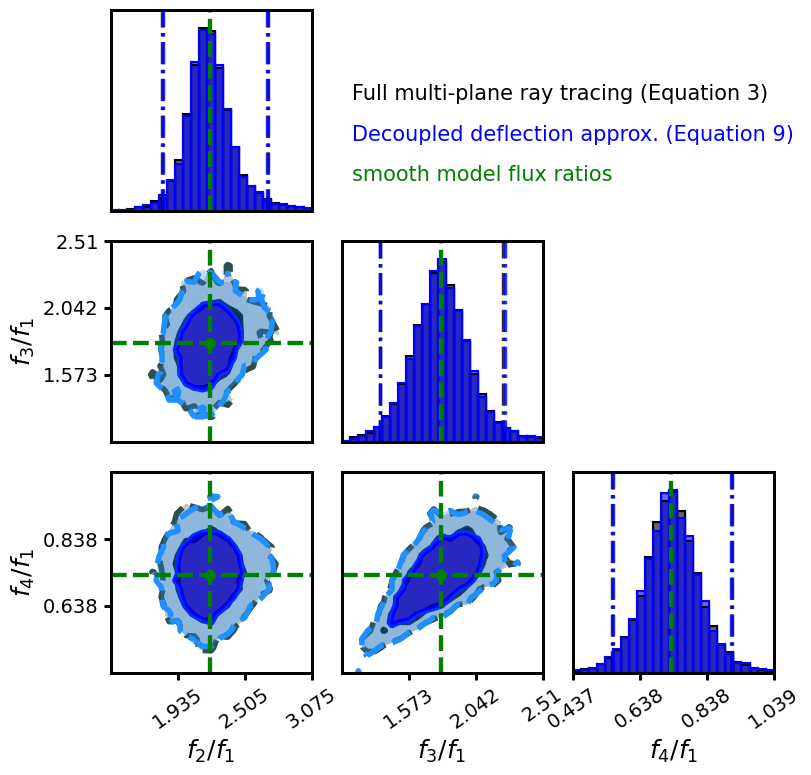

In [75]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['font.family']

from trikde.triangleplot import TrianglePlot
from trikde.pdfs import IndependentLikelihoods, DensitySamples, CustomPriorHyperCube

param_names = [r'$f_2 / f_1$', r'$f_3 / f_1$', r'$f_4 / f_1$']
use_kde = False
nbins = 25
true_flux_ratios = np.array([2.21163573, 1.79655913, 0.73043591])
truths = {param_names[0]: true_flux_ratios[0], 
          param_names[1]: true_flux_ratios[1], 
          param_names[2]: true_flux_ratios[2]}
#param_ranges = [[1.0, 2.6], [0.6, 2.0], [0.2,2.4]]
param_ranges = None
density1cdm = DensitySamples(flux_ratios_CDM_exact, param_names, None, param_ranges, nbins=nbins, 
                              use_kde=use_kde)
density2cdm = DensitySamples(flux_ratios_CDM_approx, param_names, None, density1cdm.param_ranges, nbins=nbins, 
                              use_kde=use_kde)
# density1wdm = DensitySamples(flux_ratios_WDM85_exact, param_names, None, param_ranges, nbins=nbins, 
#                               use_kde=use_kde)
# density2wdm = DensitySamples(flux_ratios_WDM85_approx, param_names, None, param_ranges, nbins=nbins, 
#                               use_kde=use_kde)

like1 = IndependentLikelihoods([density1cdm])
like2 = IndependentLikelihoods([density2cdm])
# like3 = IndepdendentLikelihoods([density1wdm])
# like4 = IndepdendentLikelihoods([density2wdm])

triplot = TrianglePlot([like1, like2])
ax1 = triplot.make_triplot(truths=truths, tick_label_font=14, axis_label_font=18, xtick_label_rotate=35,
                          fig_size=6)
ax1[2].annotate('Full multi-plane ray tracing (Equation 3)', xy=(-1.1, 0.55), xycoords='axes fraction', 
                color='k', fontsize=15)
ax1[2].annotate('Decoupled deflection approx. (Equation 9)', xy=(-1.1, 0.35), xycoords='axes fraction', 
                color='b', fontsize=15)
ax1[2].annotate('smooth model flux ratios', xy=(-1.1, 0.15), xycoords='axes fraction', 
                color='g', fontsize=15)

plt.tight_layout()
#plt.savefig('flux_ratio_test_v2.pdf')
plt.show()

In [76]:
from scipy.stats import ks_2samp

print(ks_2samp(flux_ratios_CDM_exact[:,0], flux_ratios_CDM_approx[:,0]))
print(ks_2samp(flux_ratios_CDM_exact[:,1], flux_ratios_CDM_approx[:,1]))
print(ks_2samp(flux_ratios_CDM_exact[:,2], flux_ratios_CDM_approx[:,2]))

KstestResult(statistic=0.0051, pvalue=0.9994733564875755)
KstestResult(statistic=0.0045, pvalue=0.9999598601007019)
KstestResult(statistic=0.0062, pvalue=0.9906834584178017)


In [92]:
idx_1 = 0
cond1 = flux_ratios_CDM_exact[:,idx_1] > 1.8
cond2 = flux_ratios_CDM_exact[:,idx_1] < 2.0
inds_keep_1 = np.where(np.logical_and(cond1, cond2))[0]

cond1 = flux_ratios_CDM_approx[:,idx_1] > 1.8
cond2 = flux_ratios_CDM_approx[:,idx_1] < 2.0
inds_keep_2 = np.where(np.logical_and(cond1, cond2))[0]

print(ks_2samp(flux_ratios_CDM_exact[inds_keep_1,0], flux_ratios_CDM_approx[inds_keep_2,0]))

idx_1 = 1
cond1 = flux_ratios_CDM_exact[:,idx_1] > 1.9
cond2 = flux_ratios_CDM_exact[:,idx_1] < 2.1
inds_keep_1 = np.where(np.logical_and(cond1, cond2))[0]

cond1 = flux_ratios_CDM_approx[:,idx_1] > 1.9
cond2 = flux_ratios_CDM_approx[:,idx_1] < 2.1
inds_keep_2 = np.where(np.logical_and(cond1, cond2))[0]

print(ks_2samp(flux_ratios_CDM_exact[inds_keep_1,0], flux_ratios_CDM_approx[inds_keep_2,0]))

idx_1 = 2
cond1 = flux_ratios_CDM_exact[:,idx_1] > 0.3
cond2 = flux_ratios_CDM_exact[:,idx_1] < 0.4
inds_keep_1 = np.where(np.logical_and(cond1, cond2))[0]

cond1 = flux_ratios_CDM_approx[:,idx_1] > 0.3
cond2 = flux_ratios_CDM_approx[:,idx_1] < 0.4
inds_keep_2 = np.where(np.logical_and(cond1, cond2))[0]

print(ks_2samp(flux_ratios_CDM_exact[inds_keep_1,0], flux_ratios_CDM_approx[inds_keep_2,0]))

KstestResult(statistic=0.032266843401113555, pvalue=0.676726887917216)
KstestResult(statistic=0.01170501403294122, pvalue=0.9978515359047935)
KstestResult(statistic=0.32142857142857145, pvalue=0.8909090909090908)
